<a href="https://colab.research.google.com/github/egorik3z/ML/blob/master/ML31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)

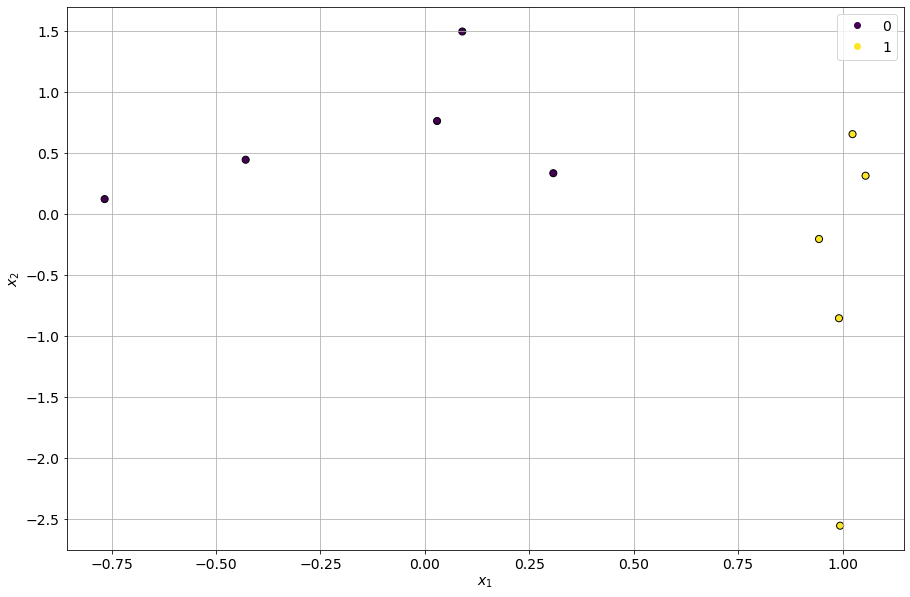

In [56]:

from sklearn.datasets import make_classification

X_data, y_data = make_classification(
    n_samples=10,
    n_features=2, 
    n_redundant=0,
    n_informative=1, 
    n_clusters_per_class=1,
    random_state=RANDOM_STATE
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [57]:
  # TODO - напишите реализацию функции вычисления Джини
def gini_impurity(y):
    if (len(y)==0):
      return 0
    p0=len(y[y==1])/len(y)
    p1=len(y[y==0])/len(y)
    gini=p0*(1-p0)+p1*(1-p1)
    return gini

In [58]:
# TEST
y1 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y3 = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
y4 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

assert gini_impurity(y1) == 0.5
assert gini_impurity(y2) == 0
assert gini_impurity(y3) == 0.32
assert gini_impurity(y4) == 0
assert gini_impurity(np.array([])) == 0

In [59]:
# TODO
def predict_v1(X):
    # Напишите реализацию функции предсказания
    #   решающего дерева с одним узлом
    #   разделение по признаку (x1) с порогом 0.5
    # *Не забывайте о размерности данных X
    y_pred=np.zeros_like(X[:,0])
    y_pred[X[:,0]>0.5]=1
    return y_pred

In [60]:

# TEST
X = np.array([
    [1, 1],
    [2, 1],
    [0, 1],
])

assert np.all(predict_v1(X) == np.array([1, 1, 0]))

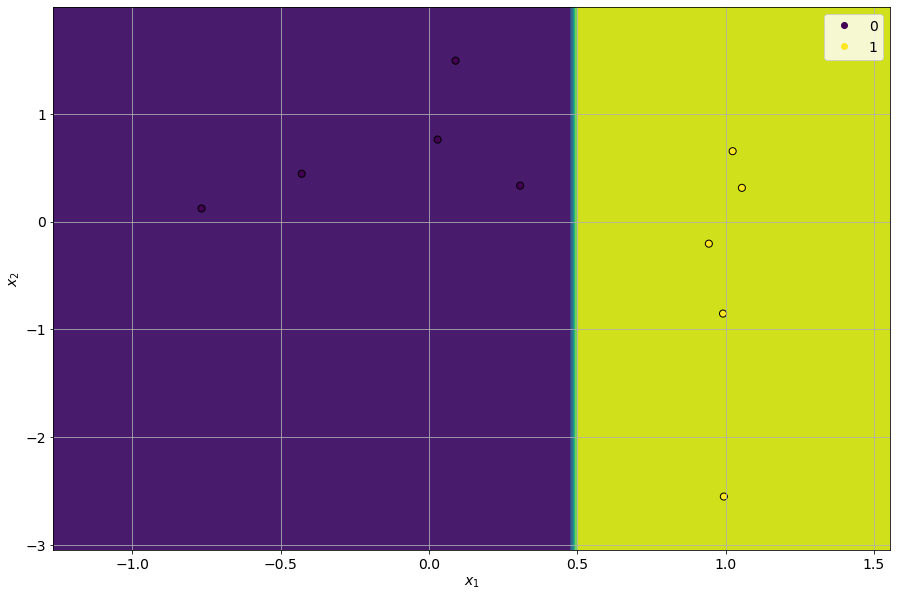

In [61]:
X = X_data
y_true = y_data

x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
space_X = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict_v1(space_X)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
plt.show()

In [62]:
thresholds = [-0.5, 0.5, 1]
feature_index = 0

X = X_data
y_true = y_data

gini_full = gini_impurity(y_true)
print(f'Gini full: {gini_full} | count: {len(y_true)}')

for threshold in thresholds:
    print(f'\tSplit by {threshold}')
    split_mask = X[:, feature_index] > threshold
    y_true_left = y_true[split_mask]
    y_true_right = y_true[~split_mask]
    
    gini_left = gini_impurity(y_true_left)
    gini_right = gini_impurity(y_true_right)

    print(f'\t\tGini left: {gini_left} | element count: {len(y_true_left)}')
    print(f'\t\tGini right: {gini_right} | element count: {len(y_true_right)}')

Gini full: 0.5 | count: 10
	Split by -0.5
		Gini left: 0.49382716049382713 | element count: 9
		Gini right: 0.0 | element count: 1
	Split by 0.5
		Gini left: 0.0 | element count: 5
		Gini right: 0.0 | element count: 5
	Split by 1
		Gini left: 0.0 | element count: 2
		Gini right: 0.46875 | element count: 8


In [63]:
thresholds = [-0.5, 0.5, 1]
feature_index = 0

X = X_data
y_true = y_data

gini_full = gini_impurity(y_true)
print(f'Gini full: {gini_full}')

for threshold in thresholds:
    print(f'\tSplit by {threshold}')
    split_mask = X[:, feature_index] > threshold
    y_true_left = y_true[split_mask]
    y_true_right = y_true[~split_mask]
    
    gini_left = gini_impurity(y_true_left)
    gini_right = gini_impurity(y_true_right)

    print(f'\t\tGini left: {gini_left}')
    print(f'\t\tGini right: {gini_right}')
    
    weight_left = len(y_true_left)/len(y_true)
    weight_right = len(y_true_right)/len(y_true)
    weighted_gini = weight_left * gini_left + weight_right * gini_right
    print(f'\t\tGini after split: {weighted_gini}')
    print(f'\t\tGini gain: {gini_full-weighted_gini}')

Gini full: 0.5
	Split by -0.5
		Gini left: 0.49382716049382713
		Gini right: 0.0
		Gini after split: 0.4444444444444444
		Gini gain: 0.05555555555555558
	Split by 0.5
		Gini left: 0.0
		Gini right: 0.0
		Gini after split: 0.0
		Gini gain: 0.5
	Split by 1
		Gini left: 0.0
		Gini right: 0.46875
		Gini after split: 0.375
		Gini gain: 0.125


In [64]:
def get_best_split(X, y_true):
    best_gini_gain = 0
    best_gini_impurity = 0
    best_feature_idx = 0
    best_threshold = 0
    gini_full = gini_impurity(y_true)
    # TODO - дополните реализацию функции получения наилучшего разделения
    for feat in range(X.shape[1]):
      for dat in range(X.shape[0]):
        split_mask = X[:, feat] > X[dat,feat]
        y_true_left = y_true[split_mask]
        y_true_right = y_true[~split_mask]

        gini_left = gini_impurity(y_true_left)
        gini_right = gini_impurity(y_true_right)
        
        weight_left = len(y_true_left)/len(y_true)
        weight_right = len(y_true_right)/len(y_true)
        weighted_gini = weight_left * gini_left + weight_right * gini_right
        gini_gain=gini_full-weighted_gini
        if (gini_gain>best_gini_gain):
          best_gini_gain=gini_gain
          best_threshold=X[dat,feat]
          best_feature_idx=feat
          best_gini_impurity=weighted_gini
    return best_gini_impurity, best_feature_idx, best_threshold

In [65]:
# TEST
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([1, 1, 1, 1, 0, 0, 0, 1])

best_gini, best_feature_idx, best_threshold = get_best_split(X, y)

assert np.isclose(best_gini, 0.1875)
assert np.isclose(best_threshold, 4)
assert best_feature_idx == 0

In [66]:
best_gini, best_feature_idx, best_threshold = get_best_split(X_data, y_data)

print(
    f"Best gini impurity:\t{best_gini}",
    f"\nBest feature index:\t{best_feature_idx}",
    f"\nBest threshold value:\t{best_threshold}"
)

Best gini impurity:	0.0 
Best feature index:	0 
Best threshold value:	0.3074493077524587


In [67]:
# TODO
def predict_v2(X, feature_index, threshold):
    # Напишите реализацию функции предсказания
    #   решающего дерева с одним узлом
    #   разделение по признаку (x1) с порогом 0.5
    # *Не забывайте о размерности данных X
    y_pred=np.zeros_like(X[:,feature_index])
    y_pred[X[:,feature_index]>threshold]=1
    return y_pred

In [68]:
# TEST
X = X_data
y_true = y_data

y_pred = predict_v2(X, best_feature_idx, best_threshold)
assert np.all(y_true == y_pred)

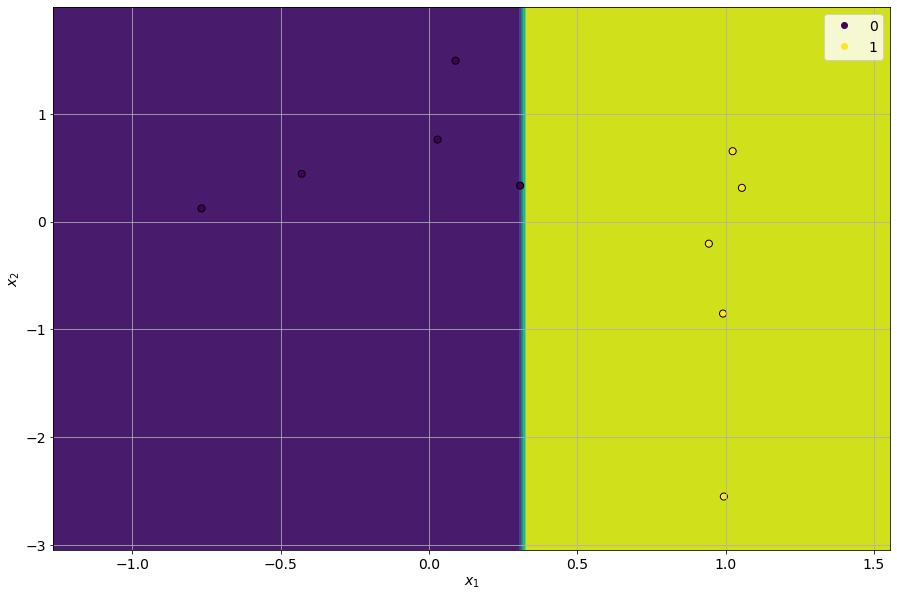

In [69]:
X = X_data
y_true = y_data

x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
space_X = np.c_[xx.ravel(), yy.ravel()]

y_pred = predict_v2(space_X, best_feature_idx, best_threshold)
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred)
pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
plt.show()

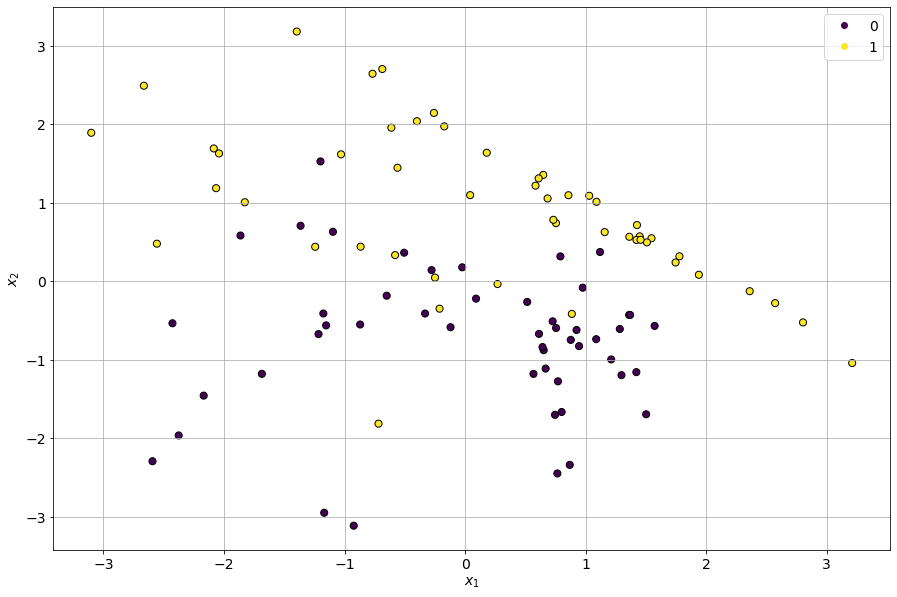

In [70]:
X_data, y_data = make_classification(
    n_samples=100,
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    n_clusters_per_class=2,
    random_state=3
)

pnts_scatter = plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=y_data, s=50, edgecolor='k', )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1'])

In [71]:
class DecisionLeaf:
    def __init__(self, depth):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина листа, на котором он располагается
        '''
        self.predict_class = None
        self.depth = depth

    def predict(self, X):
        ''' Функция предсказания листа

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний, заполненный значениями
                класса листа
        '''
        # TODO - напишите функцию предсказания
        y_pred=np.full(X.shape[0],self.predict_class)
        return y_pred

    def fit(self, X, y):
        ''' Метод находит в данных класс с наибольшим количеством записей
            и присваивает его листу как наиболее вероятно 
            предсказываемый класс
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите функцию обучения
        # Выбираем из y наиболее часто встречающееся значение 
        #   и присваиваем self.predict_class
        #   это и будет предсказываемый класс листа
        class1=np.unique(y)
        for i in class1:
          if(len([y==self.predict_class])<len(y[y==i])):
            self.predict_class=i

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # TODO - напишите функцию возврата глубины, на которой находится лист
        return self.depth

    def print(self):
        ''' Вывод информации о листе '''
        print(f'{self.depth*" "}> Class {self.predict_class}')

In [72]:
# TEST
leaf = DecisionLeaf(1)

assert leaf.get_max_depth() == 1

X = np.array([1, 1, 1, 3]).reshape(-1, 1)
y = np.array([0, 1, 1, 2])
leaf.fit(X, y)

y_pred = leaf.predict(X)
y_true = np.array([1, 1, 1, 1])

assert np.all(y_pred == y_true)
assert np.all(y_pred.shape == y_true.shape)

In [159]:
class DecisionNode:
    def __init__(self, depth, depth_limit, min_samples_split):
        ''' Конструктор класса
        Аргументы
        ---------
            depth: int
                глубина узла, на которой он располагается

            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''
        # Глубина, на которой узел находится
        self.depth = depth
        # Максимальная глубина
        self.depth_limit = depth_limit
        # Минимальное количество записей после сплита, чтобы создать узел
        self.min_samples_split = min_samples_split
        # Индекс признака, по которому узел делает разделение
        self.feature_index = None
        # Порог для разделения
        self.threshold = None

        # Аттрибуты для веток (правая ~ true, левая ~ false)
        self.true_elem = None
        self.false_elem = None
    
    def _create_new_element(self, X, y):
        ''' Метод создания нового элемента
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # Если в разметке остались уникальные классы - создаем лист
        if len(set(y)) == 1:
            return DecisionLeaf(self.depth+1)
        # TODO - допишите ограничения 
        #   на минимальное количество записей в данных
        #   и ограничение глубины
        if (len(y)<=self.min_samples_split):
            return DecisionLeaf(self.depth+1)
        if (self.depth>=self.depth_limit-1):
            return DecisionLeaf(self.depth+1)

        # Если так и не вернули лист - то возвращаем узел
        # У него увеличиваем глубину на 1 и пробрасываем инфу об ограничениях
        return DecisionNode(
            self.depth+1, 
            self.depth_limit,
            self.min_samples_split
        )

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        # TODO - напишите реализацию метода предсказания

        # Получите маску разделения
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        left_X=X[~mask]
        # Вот формируем вектор предсказания
        prediction = np.ndarray(X.shape[0], dtype=int)

        # Вот заполняем предсказания одной ветви
        prediction[~mask] = self.false_elem.predict(left_X)
        prediction[mask] = self.true_elem.predict(right_X)
        # Сделайте заполнения для второй ветви
        print(prediction[mask])

        return prediction
    def get_best_split(self, X, y_true):
        best_gini_gain = 0
        best_gini_impurity = 0
        best_feature_idx = 0
        best_threshold = 0
        gini_full = gini_impurity(y_true)
        # TODO - дополните реализацию функции получения наилучшего разделения
        for fear in range(X.shape[1]):
          for dat in range(X.shape[0]):
            split_mask = X[:, fear] > X[dat,fear]
            y_true_left = y_true[split_mask]
            y_true_right = y_true[~split_mask]

            gini_left = gini_impurity(y_true_left)
            gini_right = gini_impurity(y_true_right)
            
            weight_left = len(y_true_left)/len(y_true)
            weight_right = len(y_true_right)/len(y_true)
            weighted_gini = weight_left * gini_left + weight_right * gini_right
            gini_gain=gini_full-weighted_gini
            if (gini_gain>best_gini_gain):
              best_gini_gain=gini_gain
              best_threshold=X[dat,fear]
              best_feature_idx=fear
              best_gini_impurity=weighted_gini
        return best_feature_idx, best_threshold
    def fit(self, X, y):
        ''' Метод обучения узла
        
        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных для обучения 
            y : ndarray [n_samples]
                вектор истинных значений классов  
        '''
        # TODO - напишите реализацию метода обучения

        # Получите лучший сплит

        # Сохраните параметры сплита в self.feature_index и self.threshold
        self.feature_index, self.threshold = self.get_best_split(X, y)
        # Вот здесь мы создаем маску для деления
        mask = X[:, self.feature_index] > self.threshold
        right_X = X[mask]
        right_y = y[mask]

        self.true_elem = self._create_new_element(right_X, right_y)
        self.true_elem.fit(right_X, right_y)
        
        # Вам нужно сделать аналогичные действия для другой ветки
        
        left_X = X[~mask]
        left_y = y[~mask]

        self.false_elem = self._create_new_element(left_X, left_y)
        self.false_elem.fit(left_X, left_y)

    def get_max_depth(self):
        ''' Получение информации о максимальной глубине
        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        # Берем максимум от максимальной глубины по веткам
        return max([
            self.true_elem.get_max_depth(), 
            self.false_elem.get_max_depth()
        ])
    
    def print(self):
        ''' Вывод информации об узле '''
        print(f'{self.depth*" "}| {self.feature_index} > {self.threshold}')
        self.true_elem.print()
        self.false_elem.print()

In [160]:
# TEST
# Допустим, что узел на уровне 1 и максимальная глубина = 2
# Ограничение на минимальное количество уберем
node = DecisionNode(1, 2, 0)

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 0])
node.fit(X, y)

y_pred = node.predict(X)
y_true = np.array([0, 0, 1, 1, 1])

assert node.get_max_depth() == 2
assert np.all(y_pred == y_true)
assert np.all(y_pred.shape == y_true.shape)

[1 1 1]


In [135]:

class DecisionTree:
    def __init__(self, depth_limit, min_samples_split):
        ''' Конструктор класса
        
        Аргументы
        ---------
            depth_limit: int
                максимальная глубина дерева
            
            min_samples_split: int
                минимальное количество записей для создания узла
        '''
        self.root = DecisionNode(0, depth_limit, min_samples_split)

    def predict(self, X):
        ''' Функция предсказания узла

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных

        Возвращает
        ----------
            predict: ndarray [n_samples]
                вектор предсказаний
        '''
        return self.root.predict(X)

    def fit(self, X, y):
        ''' Функция обучения

        Аргументы
        ---------
            X : ndarray [n_samples, n_features]
                матрица данных
        '''
        self.root.fit(X, y)

    def get_depth(self):
        ''' Получение информации о глубине дерева

        Возвращает
        ----------
            depth: int
                глубина листа        
        '''
        return self.root.get_max_depth()
    
    def print(self):
        ''' Вывод информации о дереве '''
        self.root.print()

In [136]:
# TEST
X = X_data
y_true = y_data

# Снимем ограничения дерева
# Не ограничиваем глубину и минимальное кол-во записей для узла
tree = DecisionTree(100, 0)
tree.fit(X,y_true)

assert tree.get_depth() == 6

In [137]:
tree.print()

| 1 > -0.18139161596997877
 | 1 > 0.3745125530056157
  | 0 > -1.096615964304849
   > Class 1
   | 0 > -1.2439900718574142
    > Class 0
    | 1 > 0.7091967442272131
     > Class 1
     | 1 > 0.48095734722628103
      > Class 0
      > Class 1
  | 0 > 1.1187257041052354
   > Class 1
   | 0 > -0.5810000805093616
    | 1 > 0.04912870149405335
     > Class 0
     | 0 > 0.2684264804344745
      > Class None
      > Class 1
    > Class None
 | 0 > 1.5712194041070418
  > Class 1
  | 1 > -0.42680267791699533
   | 0 > 0.5144652486005934
    > Class None
    | 0 > -0.3325225345080114
     | 0 > -0.21235292176894527
      > Class 0
      > Class None
     > Class 0
   | 1 > -1.8111327315138177
    > Class 0
    | 1 > -1.9609526821607552
     > Class None
     > Class 0


In [138]:
def plot_tree_decision_space(X, y_true, tree):
    x1_vals = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300)
    x2_vals = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
    xx, yy = np.meshgrid(x1_vals, x2_vals)
    space_X = np.c_[xx.ravel(), yy.ravel()]

    y_pred = tree.predict(space_X)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred)
    pnts_scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.legend(handles=pnts_scatter.legend_elements()[0], labels=['0', '1', '2'])
    plt.show()

In [139]:
plot_tree_decision_space(X, y_true, tree)

TypeError: ignored

NameError: ignored